<center> <h1>MSDS 7331 - Project 2</h1> </center>
<center> <h1>Johnson Ekedum, Ekaterina Pirogova, Victor Yim</h1> </center>
<center> <h2>10/29/2017</h2> </center>
<center> <h1>Classification methods</h1> </center>

Porto Seguro is auto insurance company located in Brazil. This is essential for a company to determine a person who is likely to initiate an auto insureance claim the next year. If the person is likely to initiate the claim he will be billed more to cover the claim's costs. If the person isn't going to initiate the claim next year the company doesn't want to charge more this person and this way to get more customers. For this reason we were presented with a data set containing 595212 records of the drivers insured by this company and 59 features for each record. This features include the record id, the target variable wich represents if the person submitted claim or not and various categorical and contineous features.

In [1]:
#improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import pylab
from sklearn.datasets import make_classification
import sklearn
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics as mt
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pandas.tools.plotting import boxplot
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [2]:
#upload dataset
drivers=pd.read_csv('D:\OneDrive\Study\Kaggle\PortoSeguroSafeDriverPrediction/train.csv')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drivers.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,487440.000000,595105.000000,595207.000000,183981.000000,595212.000000,328661.000000,595212.000000,583723.000000,595212.000000,594643.000000,595212.000000,595212.000000,595207.000000,595211.000000,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.894047,8.297605,0.829947,0.601741,0.725192,0.525365,6.555340,0.947621,0.832080,1.331118,0.992136,62.215674,2.346100,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.345413,2.505396,0.375680,0.489541,2.153463,0.499357,5.501445,0.222791,0.373796,0.976559,0.091619,33.012455,0.832495,0.058300,0.224588,0.045610,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.633443,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.350428,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.801561,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.0000

### Let's have a look of what each variable represents:

ps_ind_01 supposed to be ordinal variable

col_0,Percent
ps_ind_01,
0,31.517174
1,24.190373
2,13.855231
5,10.326405
3,8.600801
4,5.632279
6,2.970706
7,2.907031


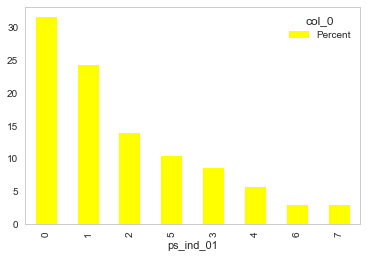

In [17]:
ps_ind_01_counts = pd.crosstab(index = drivers["ps_ind_01"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
ps_ind_01_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
ps_ind_01_counts

We can see that this variable is indeed ordinal. The levels are unbalanced with the lowest level having 3% of records and hightes level having 31% of records. Let's make it category ordinal and have a look if it has different levels for our target variable.

In [24]:
drivers["ps_ind_01"].astype('category',ordered=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


target,0,1
ps_ind_01,,
0,96.677932,3.322068
1,96.637126,3.362874
2,96.313722,3.686278
3,95.903737,4.096263
4,95.486815,4.513185
5,95.968372,4.031628
6,95.684877,4.315123
7,95.786858,4.213142


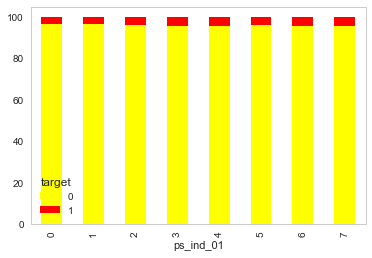

In [21]:
ps_ind_01_counts = pd.crosstab(drivers["ps_ind_01"],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
ps_ind_01_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
ps_ind_01_counts

We can see that variability is low.

ps_ind_02_cat supposed to be categorical variable. Let's have a look at the levels of this variable and how target variable distributed among them.

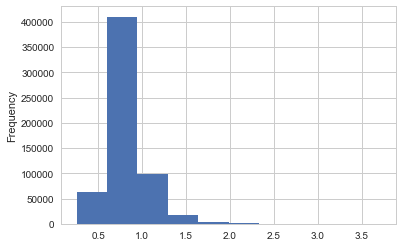

In [15]:
plt.figure()
drivers["ps_car_13"].plot.hist()

From the description to the data set we know that variables ending on "cat" or "bin" are categorical. And the rest either contineous or ordianal.
From the visualizations above we can see that following variables are categorical:
binary:

ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_08_cat

non-binary:

ps_ind_02_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_04_cat, ps_car_06_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat

We assume that following features are contineous because they have floating point number type with long tail of numbers after the point. The contineous features are:

ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15

Ordinal features:

ps_reg_01, ps_reg_02, ps_ind_01, ps_ind_03, ps_ind_14, ps_ind_15, ps_car_11, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,
ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14

Missing values are coded with value -1. We will replace it with nan value. So, let's see how many missing variables we have:

In [3]:
# Replace missing values to NaN
drivers = drivers.replace(to_replace=-1,value=np.nan)
#Percent of missing values in dataset
missVal=drivers.isnull().sum()*100/len(drivers)
missVal.iloc[missVal.nonzero()]

ps_ind_02_cat     0.036290
ps_ind_04_cat     0.013945
ps_ind_05_cat     0.975955
ps_reg_03        18.106490
ps_car_01_cat     0.017977
ps_car_02_cat     0.000840
ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_car_07_cat     1.930237
ps_car_09_cat     0.095596
ps_car_11         0.000840
ps_car_12         0.000168
ps_car_14         7.160474
dtype: float64

We have some missing values in categorical features ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_02_cat  , ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_09_cat. And some missing values in the following features which can be either ordinal or contineous ps_reg_03, ps_car_11, ps_car_12, ps_car_14. 

ps_car_11 must be categorical ordinal feature because it has interger values.
ps_reg_03, ps_car_12, ps_car_14 must be contineous features. Because they have long float points numbers.

The features containing "cat" at the end - are categorical features. The features containing "bin" at the end are binary features. Let's make all this features a categorical type.